In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reviews-label-dataset/labels.txt
/kaggle/input/reviews-label-dataset/reviews.txt


In [20]:
import warnings
warnings.filterwarnings("ignore")

# STEP 1: IMPORT LIBRARIES
In this step, we import all the necessary Python libraries required to build and train our sentiment analysis model. Libraries like NumPy and pandas help in data handling, while TensorFlow and Keras provide tools to create and train deep learning models. We also import tools for tokenizing and padding text, and for splitting the dataset into training and testing sets.

In [21]:
# STEP 1: IMPORT LIBRARIES
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split

# STEP 2: LOAD REVIEWS AND LABELS
Here, we read the raw data from two text files: one containing user-written reviews, and another containing their corresponding sentiment labels (positive or negative). Each line in the reviews.txt file represents a single review, and each line in the labels.txt file represents the sentiment for that review. We then convert the textual labels into numerical form, where 1 means positive and 0 means negative, so the model can understand and work with them.

In [22]:
# STEP 2: LOAD REVIEWS AND LABELS
# Each line in reviews.txt is a review
with open("/kaggle/input/reviews-label-dataset/reviews.txt", "r", encoding="utf-8") as f:
    reviews = f.read().splitlines()

# Each line in labels.txt is 'positive' or 'negative'
with open("/kaggle/input/reviews-label-dataset/labels.txt", "r") as f:
    labels = f.read().splitlines()

In [23]:
# Convert labels to binary: positive = 1, negative = 0
labels = [1 if label.lower() == "positive" else 0 for label in labels]

# STEP 3: TOKENIZE AND PAD THE TEXT
Before feeding text data into a neural network, we need to convert it into numerical format. This step uses a tokenizer to assign a unique number to each word based on its frequency in the data. The reviews are then converted into sequences of numbers. However, since reviews vary in length, we pad (or truncate) all sequences to a fixed size so they can be processed in batches efficiently. This is an essential step for deep learning models that require uniform input dimensions.

In [24]:
# STEP 3: TOKENIZE AND PAD THE TEXT
vocab_size = 10000    # Number of words to keep in vocabulary
maxlen = 200          # Max length of a review in words

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)

# Convert reviews to sequences of word indices
sequences = tokenizer.texts_to_sequences(reviews)

# Pad sequences so they all have the same length
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

# STEP 4: TRAIN-TEST SPLIT
To evaluate how well our model performs on unseen data, we divide the dataset into two parts: one for training the model and the other for testing it afterward. Typically, 80% of the data is used for training, and the remaining 20% is set aside for testing. This helps us assess whether the model has learned the patterns in the training data and can generalize them to new, unseen reviews.

In [25]:
# STEP 4: TRAIN-TEST SPLIT
X = np.array(padded_sequences)
y = np.array(labels)

# Split into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: BUILD THE CNN MODEL FOR TEXT
Here, we define our Convolutional Neural Network (CNN) model. First, we use an Embedding layer that transforms each word into a dense vector representation (embedding), capturing semantic meaning. Next, a 1D Convolutional layer slides over these vectors to detect useful local patterns (like phrases or word combinations). We use Global Max Pooling to keep the most important features, followed by Dense (fully connected) layers that process this information and output the final prediction — whether the sentiment is positive or negative.

In [26]:
# STEP 5: BUILD THE CNN MODEL FOR TEXT
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))  # Converts words to dense vectors
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))                  # 1D convolution (like sliding over text)
model.add(GlobalMaxPooling1D())                                                  # Takes max of each feature map
model.add(Dense(64, activation='relu'))                                          # Fully connected hidden layer
model.add(Dense(1, activation='sigmoid'))  

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# STEP 6: COMPILE THE MODEL
After defining the model architecture, we compile it to prepare for training. We use the Adam optimizer, which helps in efficient and adaptive learning. The loss function used is binary crossentropy, as this is a binary classification task (positive vs. negative). We also track the model's accuracy during training, which gives us a sense of how well it's learning from the data.

In [28]:
# STEP 6: COMPILE THE MODEL
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# STEP 7: TRAIN THE MODEL
In this step, we fit the model on the training data. The model processes the input data in small batches, repeatedly adjusting its weights over several passes (epochs) through the dataset. During each epoch, the model also evaluates its performance on the validation (test) data so we can monitor progress and detect overfitting or underfitting early. This is where the model actually "learns" to distinguish between positive and negative reviews.

In [29]:
# STEP 7: TRAIN THE MODEL
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6963 - loss: 0.5479 - val_accuracy: 0.8658 - val_loss: 0.3169
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9309 - loss: 0.1865 - val_accuracy: 0.8560 - val_loss: 0.3558
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9901 - loss: 0.0438 - val_accuracy: 0.8688 - val_loss: 0.4184
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9995 - loss: 0.0055 - val_accuracy: 0.8668 - val_loss: 0.5112
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8708 - val_loss: 0.5081
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.8042e-04 - val_accuracy: 0.8712 - val_loss: 0.5336
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.3805e-04 - val_accuracy: 0.8712 - val_loss: 0.5625
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.2278e-04 - val_

# STEP 8: EVALUATE THE MODEL
After training is complete, we use the test set to evaluate the final performance of the model. This helps us understand how accurately the model can predict the sentiment of new reviews that it hasn't seen before. The test accuracy gives us a good indication of the model's real-world usefulness.

In [30]:
# STEP 8: EVALUATE THE MODEL
loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc:.2f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8706 - loss: 0.6624

Test Accuracy: 0.87


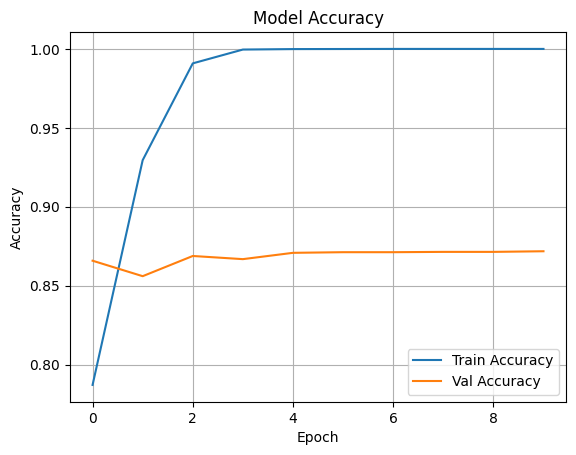

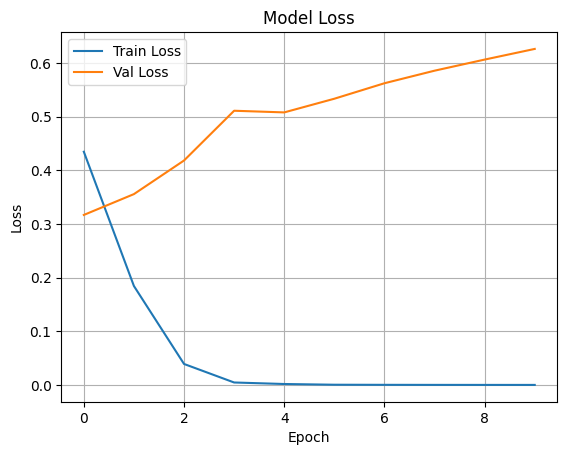

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Predict a random review


In [34]:
import random

# ---------------------------------------
# STEP 9: Predict a random review
# ---------------------------------------

# Pick a random index from the test set
random_index = random.randint(0, len(x_test) - 1)

# Get the corresponding padded sequence and actual label
random_review_sequence = x_test[random_index]
actual_label = y_test[random_index]

# Reshape input for prediction (model expects batch shape)
review_input = np.expand_dims(random_review_sequence, axis=0)

# Predict sentiment: model outputs a probability between 0 and 1
prediction_prob = model.predict(review_input)[0][0]

# Convert probability to class (0 = negative, 1 = positive)
predicted_label = 1 if prediction_prob >= 0.5 else 0

# ---------------------------------------
# Decode the review back to words (optional)
# ---------------------------------------

# Reverse word index to convert sequence back to words
word_index = tokenizer.word_index
reverse_word_index = {value: key for key, value in word_index.items()}

# Convert padded sequence to readable text
decoded_review = " ".join([reverse_word_index.get(idx, "") for idx in random_review_sequence if idx != 0])

# ---------------------------------------
# Display results
# ---------------------------------------

print("📜Random Review:\n", decoded_review)
print("\nActual Label:", "Positive" if actual_label == 1 else "Negative")
print("Predicted Label:", "Positive" if predicted_label == 1 else "Negative")
print("Prediction Probability:", round(prediction_prob, 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
📜Random Review:
 pecker proves that waters has no intention of changing his tacky ways in his old age a lot of things have changed since waters started making films in the s but years later he is still doing what he wants to do over the years the budget of waters films has <OOV> considerably this is one of his most recent productions but i was amazed to see that waters still has that trailer park touch edward <OOV> plays pecker a kid who is obsessed with photography he lives a quite life in <OOV> <OOV> with his friends and family but pecker <OOV> the attention of a new york art agent the always watchable <OOV> taylor and his life changes for the worst once again waters makes fun of art fame and <OOV> it is not among his best films but there are some big belly laughs here <OOV> has the best lines in the film it is consistently clever and funny and has that very <OOV> sensibility that i have come to love in <OOV> movies

Actual Label: Positive
Predic